### Importing, loading and preprocessing MNIST data

In [1]:
#Importing MNIST dataset
from keras.datasets import mnist

#Loading data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

print("Shape of training data:- ",x_train.shape)
print("Shape of test data:- ",x_test.shape)

Using TensorFlow backend.


Shape of training data:-  (60000, 28, 28)
Shape of test data:-  (10000, 28, 28)


In [2]:
#Training data and test data are in 3-D vector so converting it into 2-D vector (28*28=784)
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

print("Shape of training data:- ",x_train.shape)
print("Shape of test data:- ",x_test.shape)

Shape of training data:-  (60000, 784)
Shape of test data:-  (10000, 784)


In [0]:
#Data Normalization --> (x-x_min)/(x_max-x_min)
x_train = x_train/255
x_test = x_test/255

In [4]:
import pandas as pd
print("Frequency of each class labels in training data:-\n",pd.DataFrame(y_train)[0].value_counts())

Frequency of each class labels in training data:-
 1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64


In [5]:
from keras.utils import np_utils
# here we are having a class number for each image ranging from 0 to 9
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
def plt_dynamic(x, vy, ty):
    sns.set_style('whitegrid')
    plt.plot(x, vl, 'r', label="Validation Loss")
    plt.plot(x, tl, 'b', label="Train Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Cross Entropy Loss")
    plt.legend()
    plt.show()

### Architecture_1 :- input-> 2 hidden layers -> output layer

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Dense(256,input_shape = (784,),activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.5))

model.add(Dense(128,activation = 'relu', kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10,activation = 'softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)      

In [8]:
#Compiling and fitting the model
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
res = model.fit(x_train,Y_train,batch_size = 256, epochs = 20, verbose = 1, validation_data = (x_test,Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.6773 - acc: 0.7918 - val_loss: 0.1873 - val_acc: 0.9441
Epoch 2/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.2879 - acc: 0.9148 - val_loss: 0.1393 - val_acc: 0.9577
Epoch 3/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.2216 - acc: 0.9340 - val_loss: 0.1146 - val_acc: 0.9655
Epoch 4/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.1860 - acc: 0.9450 - val_loss: 0.1016 - val_acc: 0.9687
Epoch 5/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.1694 - acc: 0.9501 - val_loss: 0.0939 - val_acc: 0.9712
Epoch 6/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.1471 - acc: 0.9556 - val_loss: 0.0870 - val_acc: 0.9734
Epoch 7/20
60000/60000 [==============================] - 2s 32us/step - loss: 0

Test score: 0.06809647223775682
Test accuracy: 0.9809


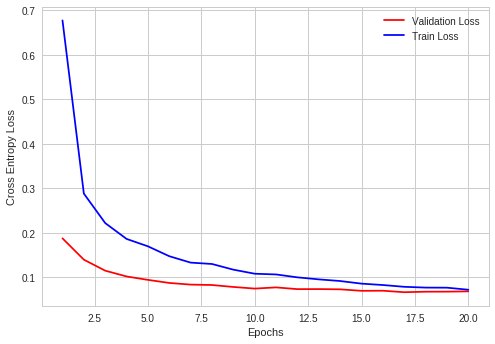

In [9]:
#Training and test loss vs n_epoch graph
score = model.evaluate(x_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# list of epoch numbers
x = list(range(1,21))

vl = res.history['val_loss']
tl = res.history['loss']
plt_dynamic(x, vl, tl)

### Architecture_2: input -> 3 hidden layers -> output layer

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Dense(512,input_shape = (784,),activation = 'relu',kernel_initializer = 'he_normal'))
model.add(Dropout(0.5))

model.add(Dense(128,activation = 'relu',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64,activation = 'relu',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(output_dim = 10,activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`


In [11]:
#Compiling and fitting the model
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
res = model.fit(x_train,Y_train,batch_size = 256, epochs = 20, verbose = 1, validation_data = (x_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.9102 - acc: 0.7183 - val_loss: 0.2286 - val_acc: 0.9350
Epoch 2/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.3494 - acc: 0.9017 - val_loss: 0.1503 - val_acc: 0.9567
Epoch 3/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.2498 - acc: 0.9307 - val_loss: 0.1231 - val_acc: 0.9636
Epoch 4/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.1998 - acc: 0.9441 - val_loss: 0.1037 - val_acc: 0.9689
Epoch 5/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.1758 - acc: 0.9515 - val_loss: 0.1012 - val_acc: 0.9715
Epoch 6/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.1499 - acc: 0.9586 - val_loss: 0.0918 - val_acc: 0.9751
Epoch 7/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.1407 - acc: 0.9610 - val_loss: 0.0867 - val_acc

Test score: 0.06795202170977137
Test accuracy: 0.9823


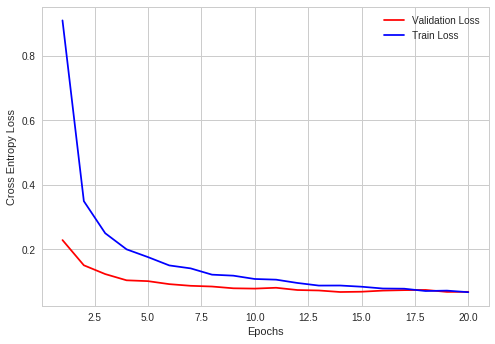

In [12]:
#Training and test loss vs #epochs graph
score = model.evaluate(x_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# list of epoch numbers
x = list(range(1,21))

vl = res.history['val_loss']
tl = res.history['loss']
plt_dynamic(x, vl, tl)

### Architecture_3: input layer -> 5 hidden layers -> output layer

In [13]:
model = Sequential()
model.add(Dense(512,input_shape = (784,),activation='relu',kernel_initializer = 'he_normal'))
model.add(Dropout(0.5))

model.add(Dense(256,activation='relu',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128,activation='relu',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(32,activation='relu',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(output_dim=10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`


In [14]:
#Compiling and fitting the model
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
res = model.fit(x_train,Y_train,batch_size = 256, epochs = 30, verbose = 1, validation_data = (x_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 90us/step - loss: 1.8725 - acc: 0.3740 - val_loss: 0.6407 - val_acc: 0.8154
Epoch 2/30
60000/60000 [==============================] - 4s 65us/step - loss: 0.8741 - acc: 0.7264 - val_loss: 0.2756 - val_acc: 0.9290
Epoch 3/30
60000/60000 [==============================] - 4s 66us/step - loss: 0.5365 - acc: 0.8532 - val_loss: 0.1804 - val_acc: 0.9502
Epoch 4/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.3932 - acc: 0.9014 - val_loss: 0.1548 - val_acc: 0.9591
Epoch 5/30
60000/60000 [==============================] - 4s 66us/step - loss: 0.3259 - acc: 0.9203 - val_loss: 0.1363 - val_acc: 0.9645
Epoch 6/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.2811 - acc: 0.9341 - val_loss: 0.1339 - val_acc: 0.9689
Epoch 7/30
60000/60000 [==============================] - 4s 66us/step - loss: 0.2544 - acc: 0.9408 - val_loss: 0.1226 - val_acc

Test score: 0.08421630402624142
Test accuracy: 0.9818


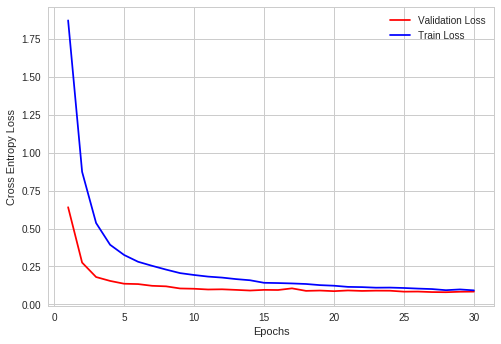

In [15]:
#Training and test loss vs #epochs graph
score = model.evaluate(x_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# list of epoch numbers
x = list(range(1,31))

vl = res.history['val_loss']
tl = res.history['loss']
plt_dynamic(x, vl, tl)

### Conclusion

| Architecture | Training Loss | Train Accuracy | Test loss | Test Accuracy |
| - | - | - | - | - |
| 2 hidden layers: 784->256->128->10 | 0.0717 | 0.9778 | 0.0618 | 0.9809 |
| 3 hidden layers: 784->512->128->64->10 | 0.0668 | 0.9811 | 0.0680 | 0.9823 |
| 5 hidden layers: 784->512->256->128->64->32->10 | 0.0925 | 0.9803 | 0.0842 | 0.9818 |

### ==========================================================================================================